# Series Missing Value Methods

In the previous chapter, we covered the most common attributes and statistical methods for pandas Series objects. In this chapter, we cover several methods that handle missing values within a Series. The official documentation has a [separate section in its Series API][1] just for these methods that handle missing values. Let's begin by reading in the movie dataset and selecting the `duration` series, which contains the length of each movie in minutes.

[1]: https://pandas.pydata.org/pandas-docs/stable/reference/series.html#missing-data-handling

In [2]:
import pandas as pd
movie = pd.read_csv('../data/movie.csv', index_col='title')
duration = movie['duration']
duration.head()

title
Avatar                                        178.0
Pirates of the Caribbean: At World's End      169.0
Spectre                                       148.0
The Dark Knight Rises                         164.0
Star Wars: Episode VII - The Force Awakens      NaN
Name: duration, dtype: float64

## Methods for handling missing values

pandas provides the following methods to handle missing values:

* `isna` - Returns a Series of booleans based on whether each value is missing or not
* `notna` - Exact opposite of `isna`
* `dropna` - Drops the missing values from the Series
* `fillna` - Fills missing values in a variety of ways
* `interpolate` - Fills missing values with statistical interpolation

As a reminder, boolean and integer columns do not allow missing values, so these methods will not be useful for Series with those data types.

## The `isna` method

The `isna` method tests whether each value in the Series is missing or not. It returns a new boolean Series where `True` corresponds with missing values and non-missing values return as `False`. Let's call the `isna` method on our `duration` Series. One of the first five values is missing.

In [3]:
duration.isna().head()

title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                         False
Star Wars: Episode VII - The Force Awakens     True
Name: duration, dtype: bool

### Counting the number of missing values

pandas does not have a single method that counts the number of missing values in a Series. We are forced to do a little work to find the result. Calling the `sum` method after the `isna` method counts the number of missing values as `True`/`False` evaluate as 1/0.

In [4]:
duration.isna().sum()

np.int64(15)

Alternatively, you can use the `count` method to count the number of non-missing values and subtract it from the length of the Series.

In [5]:
len(duration) - duration.count()

np.int64(15)

### Finding the percentage of missing values

To find the percentage of missing values in a Series, chain the `mean` method to the `isna` method.

In [6]:
duration.isna().mean()

np.float64(0.0030512611879576893)

### Alternate calculation

The last calculation might be confusing. We could have been more explicit and calculated the percentage of missing values by dividing the number missing by the total size of the Series as done below.

In [7]:
total = len(duration)
num_missing = total - duration.count()
num_missing / total

np.float64(0.0030512611879576893)

### Why does taking the mean of the boolean Series work?

The mean is defined as the sum of all values divided by the total number of values. In the case of a boolean Series, its sum is just the number of `True` values and in this specific example is equal to the number of missing values.

### The `notna` method

The `notna` method works analogously to the `isna` method but returns `True` for non-missing values. Let's verify that it returns the exact opposite result as `isna`.

In [8]:
duration.notna().head()

title
Avatar                                         True
Pirates of the Caribbean: At World's End       True
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
Name: duration, dtype: bool

Let's count the number of non-missing values by summing up the previous result.

In [9]:
duration.notna().sum()

np.int64(4901)

This is the exact calculation that the `count` method performs, so the above is unnecessary.

In [10]:
duration.count()

np.int64(4901)

## Dropping missing values with `dropna`

The `dropna` method returns a new Series without any missing values. In the `duration` Series, the fifth value was missing. After calling `dropna`, it's no longer there.

In [11]:
duration2 = duration.dropna()
duration2.head()

title
Avatar                                      178.0
Pirates of the Caribbean: At World's End    169.0
Spectre                                     148.0
The Dark Knight Rises                       164.0
John Carter                                 132.0
Name: duration, dtype: float64

Above, we calculated that there were 15 missing values in the Series. Let's verify that the length of the new Series has decreased by this amount.

In [12]:
len(duration2)

4901

In [13]:
len(duration)

4916

## Filling missing values with the `fillna` method

There are a number of ways that have been developed to fill missing values. Some of these are quite complex and involve machine learning. pandas only provides a few simple choices with the `fillna` method. Let's read in some data containing a person's weight over time. Notice that several missing values are missing.

In [14]:
weight_loss = pd.read_csv('../data/weight_loss.csv')
weight_loss

,date,weight
0,2019-10-01,NaN
1,2019-10-02,205.0
2,2019-10-03,NaN
3,2019-10-04,NaN
4,2019-10-05,201.0
5,2019-10-06,NaN
6,2019-10-07,NaN
7,2019-10-08,NaN
8,2019-10-09,199.0
9,2019-10-10,NaN


Let's select just the weight column to work with a Series.

In [15]:
weight = weight_loss['weight']
weight

0      NaN
1    205.0
2      NaN
3      NaN
4    201.0
5      NaN
6      NaN
7      NaN
8    199.0
9      NaN
Name: weight, dtype: float64

There are a few options with the `fillna` method. Passing it a single number replaces each missing value with it. Let's fill in all missing values with 200.

In [16]:
weight.fillna(200)

0    200.0
1    205.0
2    200.0
3    200.0
4    201.0
5    200.0
6    200.0
7    200.0
8    199.0
9    200.0
Name: weight, dtype: float64

A common strategy involves filling missing values with either the mean or the median. Let's calculate the median, assign it to a variable name, and then call the `fillna` method. Here, the median is 201.

In [17]:
median = weight.median()
weight.fillna(median)

0    201.0
1    205.0
2    201.0
3    201.0
4    201.0
5    201.0
6    201.0
7    201.0
8    199.0
9    201.0
Name: weight, dtype: float64

### Filling with the previous or next non-missing value

The `fillna` method provides an option to use either the previous or next non-missing value. To fill the missing value with the most recent previous non-missing value, set the `method` parameter to `'ffill'`, which stands for 'forward fill'. Let's forward fill our `weight` Series. Notice, that the first value remains missing as there is no non-missing value that comes before it.

In [18]:
weight.fillna(method='ffill')

C:\Users\nealv\AppData\Local\Temp\ipykernel_34448\3628727257.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weight.fillna(method='ffill')


0      NaN
1    205.0
2    205.0
3    205.0
4    201.0
5    201.0
6    201.0
7    201.0
8    199.0
9    199.0
Name: weight, dtype: float64

Similarly, we can fill the missing values with the next non-missing value by setting the `method` parameter to `'bfill'`, which stands for 'backward fill'. This time the last value remains missing as no non-missing value follows it.

In [19]:
weight.fillna(method='bfill')

C:\Users\nealv\AppData\Local\Temp\ipykernel_34448\2683922726.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weight.fillna(method='bfill')


0    205.0
1    205.0
2    201.0
3    201.0
4    201.0
5    199.0
6    199.0
7    199.0
8    199.0
9      NaN
Name: weight, dtype: float64

### Limit the number of missing values filled

By default, all possible missing values will be filled when the `method` parameter is set. You can limit the number of consecutive missing values filled with the `limit` parameter by setting it equal to an integer. Here, we only allow the very next missing value to be filled.

In [20]:
weight.fillna(method='ffill', limit=1)

C:\Users\nealv\AppData\Local\Temp\ipykernel_34448\2830066335.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weight.fillna(method='ffill', limit=1)


0      NaN
1    205.0
2    205.0
3      NaN
4    201.0
5    201.0
6      NaN
7      NaN
8    199.0
9    199.0
Name: weight, dtype: float64

## Filling missing values with `interpolate`

Interpolation is a more complex method for filling in missing values that gives you more control as to how the values are filled. There are many different methods for interpolation that all involve statistical calculations. In pandas, we use the `interpolate` method and choose the type of interpolation with the `method` parameter. By default, pandas does linear interpolation.

In [21]:
weight

0      NaN
1    205.0
2      NaN
3      NaN
4    201.0
5      NaN
6      NaN
7      NaN
8    199.0
9      NaN
Name: weight, dtype: float64

In [ ]:
weight.interpolate(method='linear')

0           NaN
1    205.000000
2    203.666667
3    202.333333
4    201.000000
5    200.500000
6    200.000000
7    199.500000
8    199.000000
9    199.000000
Name: weight, dtype: float64

Linear interpolation is the simplest method and computes missing values such that they are modeled using a straight line. With the `weight` Series, 205 is the 2nd value and 201 the fifth. There are two missing values between them. We compute the slope of the line between these two points as $\frac{201 - 205}{5 - 2} = -\frac{4}{3}$.

The missing values are filled in with the equation $205 - \frac{4}{3}x$ where $x$ is the number of values from the last non-missing value. This process repeats for the next interval of missing values with a new slope calculated. Interestingly, pandas fills any missing values that appear after the last non-missing value with that last non-missing value. You can prevent this by setting the `limit_area` parameter to 'inside'.

In [23]:
weight.interpolate(method='linear', limit_area='inside')

0           NaN
1    205.000000
2    203.666667
3    202.333333
4    201.000000
5    200.500000
6    200.000000
7    199.500000
8    199.000000
9           NaN
Name: weight, dtype: float64

### Many more interpolations methods

There are many more interpolation methods such as quadratic, cubic, spline, and others. Each of these methods are processed with the **scipy** library's interpolate module. You'll need to [navigate to the scipy documentation][1] to read the exact details of how the methods work. Here, we interpolate using the quadratic method.

[1]: https://docs.scipy.org/doc/scipy/reference/interpolate.html

In [24]:
weight.interpolate('quadratic')

0           NaN
1    205.000000
2    203.428571
3    202.095238
4    201.000000
5    200.142857
6    199.523810
7    199.142857
8    199.000000
9           NaN
Name: weight, dtype: float64

## Graphing interpolation methods

Comparing different interpolation methods can be aided with a graph. Here, we compare three different methods:

* `fillna` with forward filling
* linear interpolation
* quadratic interpolation

The plotting commands will be explained in the **Visualization** part of the course.

C:\Users\nealv\AppData\Local\Temp\ipykernel_34448\1222780496.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weight.fillna(method='ffill').plot(kind='line', label='ffill', legend=True)


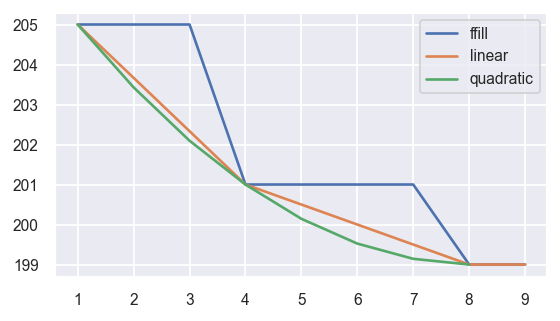

In [25]:
import seaborn as sns
sns.set_theme(rc={'figure.figsize': (5, 2.7), 'figure.dpi': 127}, 
              font_scale=0.8)
weight.fillna(method='ffill').plot(kind='line', label='ffill', legend=True)
weight.interpolate('linear').plot(kind='line', label='linear', legend=True)
weight.interpolate('quadratic').plot(kind='line', label='quadratic', legend=True);

## Interpolation methods use the index

All of the interpolation methods (except linear) use the index values during their calculation. Below, we create a copy of our data and change the index to be non-consecutive integers. Notice, how the interpolated values are different from above. 

In [29]:
w2 = weight.copy()
w2.index = [0, 1, 5, 6, 8, 12, 22, 27, 30, 35]
w2.interpolate('quadratic')

0            NaN
1     205.000000
5     202.515450
6     201.977161
8     201.000000
12    199.443350
22    197.871473
27    198.328258
30    199.000000
35           NaN
Name: weight, dtype: float64

## Exercises

Execute the following cell to use the actor 1 and actor 2 Facebook like Series for the first few exercises.

In [30]:
actor1_fb = movie['actor1_fb']
actor2_fb = movie['actor2_fb']
actor1_fb.head()

title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      40000.0
Spectre                                       11000.0
The Dark Knight Rises                         27000.0
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor1_fb, dtype: float64

In [31]:
actor2_fb.head()

title
Avatar                                          936.0
Pirates of the Caribbean: At World's End       5000.0
Spectre                                         393.0
The Dark Knight Rises                         23000.0
Star Wars: Episode VII - The Force Awakens       12.0
Name: actor2_fb, dtype: float64

### Exercise 1

<span style="color:green; font-size:16px">What percentage of actor 1 Facebook likes are missing?</span>

In [35]:
actor1_fb.isna().mean()

np.float64(0.0014239218877135883)

### Exercise 2

<span style="color:green; font-size:16px">Use the `notna` method to find the number of non-missing values in the actor 1 Facebook like column. Verify this number is the same as the `count` method.</span>

In [36]:
actor1_fb.notna().sum()

np.int64(4909)

In [37]:
actor1_fb.count()

np.int64(4909)

### Exercise 3

<span style="color:green; font-size:16px">Fill the missing values of `actor1_fb` with the maximum of `actor2_fb`. Save this result to variable `actor1_fb_full`.</span>

In [43]:
actor2_fb_max = actor2_fb.max()

actor1_fb_full = actor1_fb.fillna(actor2_fb_max)

#actor1_fb[actor1_fb.isna()].fillna(actor2_fb_max)

### Exercise 4

<span style="color:green; font-size:16px">Verify the results of Exercise 3 by selecting just the values of `actor1_fb_full` that were filled by `actor2_fb`.</span>

In [44]:
actor1_fb_full[actor1_fb.isna()]

title
Pink Ribbons, Inc.         137000.0
Sex with Strangers         137000.0
The Harvest/La Cosecha     137000.0
Ayurveda: Art of Being     137000.0
The Brain That Sings       137000.0
The Blood of My Brother    137000.0
Counting                   137000.0
Name: actor1_fb, dtype: float64

### Exercise 5

<span style="color:green; font-size:16px">Use the `duration` Series and test whether each movie is greater than 100. Assign the resulting Series to `filt`. Then test whether the `duration` Series is less than or equal to 100 and assign it to `filt2`. Call the `sum` method on both of these new Series and add their results together. Why doesn't this result equal the total length of the Series? Shouldn't a value be either greater than 100 or less than or equal to 100?</span>

In [48]:
filt = duration > 100
filt2 = duration <= 100

filt.sum() + filt2.sum()

np.int64(4901)

In [50]:
duration.count()

np.int64(4901)

### Exercise 6

<span style="color:green; font-size:16px">How many missing values are there in the `year` column?</span>

In [55]:
year = movie['year']

year.isna().sum()

np.int64(106)

### Exercise 7

<span style="color:green; font-size:16px">Select the language column as a Series and assign it to a variable with the same name. Create a variable `filt` that determines whether a language is missing. Create a new Series that fills in all missing languages with 'English' and assign it to the variable `language2`. Output both `language` and `language2` for the movies that originally had missing values.</span>

In [58]:
language = movie['language']

filt = language.isna()

language2 = language.fillna('English')

language2[filt]


title
Star Wars: Episode VII - The Force Awakens               English
10,000 B.C.                                              English
Unforgettable                                            English
Quest for Fire                                           English
September Dawn                                           English
Alpha and Omega 4: The Legend of the Saw Toothed Cave    English
Silent Movie                                             English
Samsara                                                  English
Love's Abiding Joy                                       English
Kickboxer: Vengeance                                     English
A Fine Step                                              English
Intolerance: Love's Struggle Throughout the Ages         English
The Big Parade                                           English
Over the Hill to the Poorhouse                           English
Name: language, dtype: object

In [59]:
language[filt]

title
Star Wars: Episode VII - The Force Awakens               NaN
10,000 B.C.                                              NaN
Unforgettable                                            NaN
Quest for Fire                                           NaN
September Dawn                                           NaN
Alpha and Omega 4: The Legend of the Saw Toothed Cave    NaN
Silent Movie                                             NaN
Samsara                                                  NaN
Love's Abiding Joy                                       NaN
Kickboxer: Vengeance                                     NaN
A Fine Step                                              NaN
Intolerance: Love's Struggle Throughout the Ages         NaN
The Big Parade                                           NaN
Over the Hill to the Poorhouse                           NaN
Name: language, dtype: object

### Exercise 8

<span  style="color:green; font-size:16px">Repeat exercise 7 without first assigning the language column to a variable. Reference it by using *just the brackets*. Still make a variable `language2` to verify the results.</span>

In [61]:
movie['language'].fillna('English')

title
Avatar                                        English
Pirates of the Caribbean: At World's End      English
Spectre                                       English
The Dark Knight Rises                         English
Star Wars: Episode VII - The Force Awakens    English
                                               ...   
Signed Sealed Delivered                       English
The Following                                 English
A Plague So Pleasant                          English
Shanghai Calling                              English
My Date with Drew                             English
Name: language, Length: 4916, dtype: object

### Exercise 9

<span style="color:green; font-size:16px">Select the `gross` column, and drop all missing values from it. Confirm that the new length of the resulting Series is correct.</span>

In [65]:
movie['gross'].dropna()

title
Avatar                                      760505847.0
Pirates of the Caribbean: At World's End    309404152.0
Spectre                                     200074175.0
The Dark Knight Rises                       448130642.0
John Carter                                  73058679.0
                                               ...     
Cavite                                          70071.0
El Mariachi                                   2040920.0
Newlyweds                                        4584.0
Shanghai Calling                                10443.0
My Date with Drew                               85222.0
Name: gross, Length: 4054, dtype: float64

In [66]:
movie['gross'].count()

np.int64(4054)

### Exercise 10

<span  style="color:green; font-size:16px">Read in `girl_height.csv` as a DataFrame and output all of the data. The average height for each age is found in the `height` column. Assign the `height_na` Series to a variable. Notice that all ages from 2 through 12 are missing, but all other ages have the same value as the `height` column. Use the `interpolate` method to fill in the missing values with method 'linear', 'quadratic', and 'cubic'. Save each interpolated Series to a variable with the same name as its method.</span>

In [71]:
girl_height = pd.read_csv('../data/girl_height.csv')

height_na = girl_height['height_na']


girl_height



,age,height,height_na
0,0,19.00,19.00
1,1,29.00,29.00
2,2,34.00,NaN
3,3,37.00,NaN
4,4,39.50,NaN
5,5,42.00,NaN
6,6,45.50,NaN
7,7,48.00,NaN
8,8,50.00,NaN
9,9,52.50,NaN


In [74]:
linear = height_na.interpolate(method='linear')
linear

0     19.000000
1     29.000000
2     31.708333
3     34.416667
4     37.125000
5     39.833333
6     42.541667
7     45.250000
8     47.958333
9     50.666667
10    53.375000
11    56.083333
12    58.791667
13    61.500000
14    63.500000
15    64.000000
16    64.250000
17    64.250000
18    64.250000
Name: height_na, dtype: float64

In [75]:
quadratic = height_na.interpolate(method='quadratic')
quadratic

0     19.000000
1     29.000000
2     37.423778
3     44.271335
4     49.542671
5     53.237785
6     55.356677
7     55.899348
8     55.850389
9     56.194390
10    56.931352
11    58.061274
12    59.584157
13    61.500000
14    63.500000
15    64.000000
16    64.250000
17    64.250000
18    64.250000
Name: height_na, dtype: float64

In [76]:
cubic = height_na.interpolate(method='cubic')
cubic

0     19.000000
1     29.000000
2     37.008880
3     43.263729
4     48.001636
5     51.459689
6     53.874976
7     55.484587
8     56.525609
9     57.235132
10    57.850244
11    58.608034
12    59.745589
13    61.500000
14    63.500000
15    64.000000
16    64.250000
17    64.250000
18    64.250000
Name: height_na, dtype: float64

### Exercise 11

<span style="color:green; font-size:16px">Uncomment and run the commands below to plot each interpolated Series. Which one provides the best estimate for height?</span>

<Axes: >

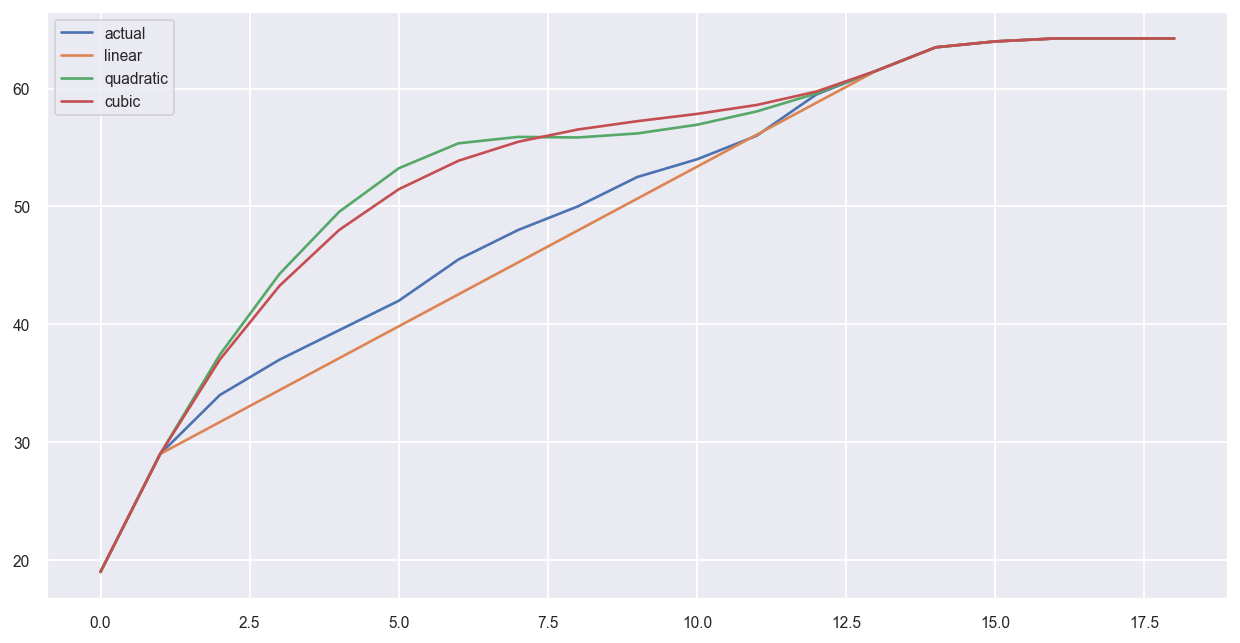

In [77]:
girl_height['height'].plot(figsize=(12, 6), label='actual', legend=True)
linear.plot(label='linear', legend=True)
quadratic.plot(label='quadratic', legend=True)
cubic.plot(label='cubic', legend=True)